<a href="https://colab.research.google.com/github/srini2805/CODSOFT/blob/main/Task_3_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload your dataset


Saving Churn_Modelling.csv to Churn_Modelling.csv


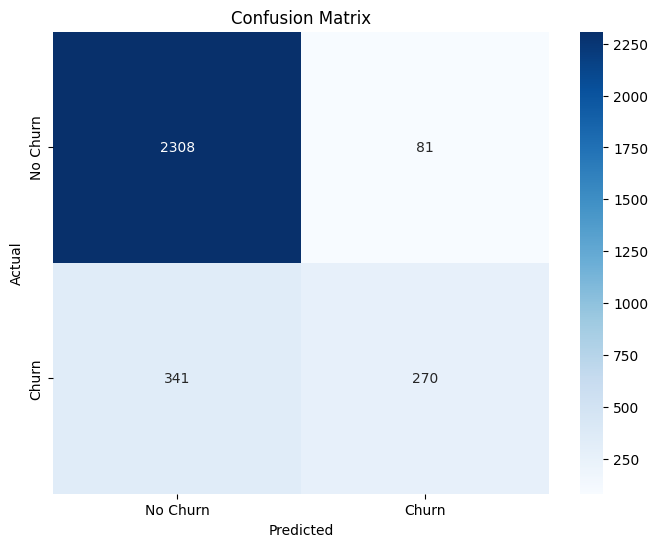

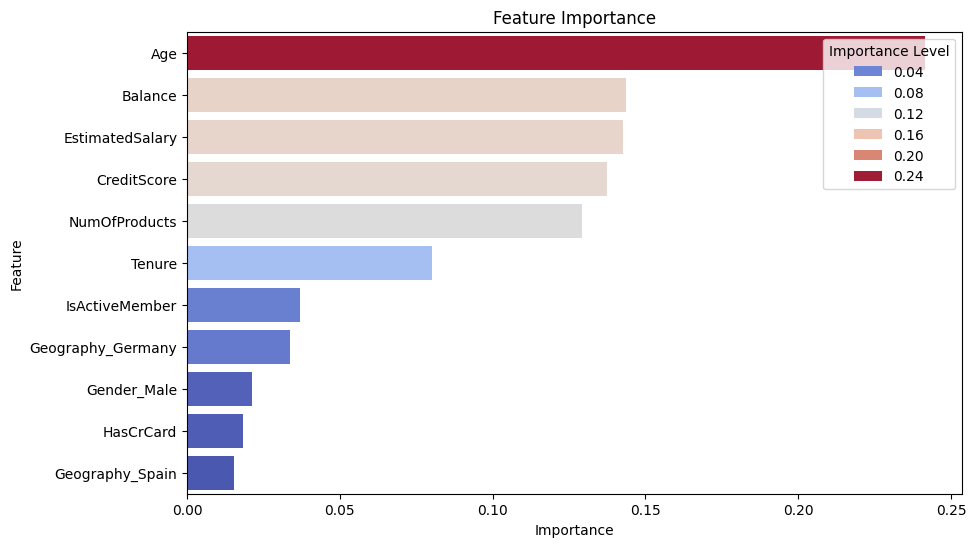

Random Forest Accuracy: 85.93%
Confusion Matrix:
[[2308   81]
 [ 341  270]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2389
           1       0.77      0.44      0.56       611

    accuracy                           0.86      3000
   macro avg       0.82      0.70      0.74      3000
weighted avg       0.85      0.86      0.84      3000



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import files

# Step 1: Upload the dataset
print("Please upload your dataset")
uploaded = files.upload()

# Step 2: Load the dataset
for file_name in uploaded.keys():
    churn_data = pd.read_csv(file_name)

# Step 3: Drop irrelevant columns
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
churn_data_cleaned = churn_data.drop(columns=columns_to_drop, axis=1)

# Step 4: One-hot encode categorical variables
categorical_features = ['Geography', 'Gender']
churn_data_encoded = pd.get_dummies(churn_data_cleaned, columns=categorical_features, drop_first=True)

# Step 5: Separate features and target variable
X = churn_data_encoded.drop('Exited', axis=1)
y = churn_data_encoded['Exited']

# Step 6: Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Step 8: Train Random Forest model
random_forest_model = RandomForestClassifier(
    random_state=42, n_estimators=100, class_weight='balanced'
)
random_forest_model.fit(X_train, y_train)

# Step 9: Predictions on test data
y_pred_rf = random_forest_model.predict(X_test)

# Step 10: Evaluate Random Forest model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)
rf_confusion = confusion_matrix(y_test, y_pred_rf)

# Step 11: Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 12: Visualize Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': random_forest_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importances,
    palette='coolwarm',
    hue='Importance',
    dodge=False
)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.legend(title='Importance Level', loc='upper right')
plt.show()

# Step 13: Print results
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(rf_confusion)
print("Classification Report:")
print(rf_report)
